In [22]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [23]:
# check for Gpu availabibility
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [24]:
# let's create dummy data , and intiate a simple linear equation 
# linear eqn y = ax + b  where a = weight , b = bias

start = 0
end = 1
step = 0.02

weight = 0.7
bias = 0.3

X = torch.arange(start,end,step)
y = weight * X + bias

##### train test split
##### we can do this in two ways :
1. sklearn using train test split
2. manually train test split

In [25]:
# can we apply some list operations here ?
type(X)

torch.Tensor

## Answer :
you can apply list slicing-like operations to PyTorch tensors. PyTorch tensors support indexing, slicing, and other operations similar to Python lists or NumPy arrays

In [26]:
# train test split manually
# 80 train , 20 % test

split_data = int(0.8 * len(X))


# slicing X_train and X_test
X_train  = X[:split_data]
X_test = X[split_data:]
X_train.shape , X_test.shape

# there's another way to also do the split if you already know how many data points but this is Lame  

(torch.Size([40]), torch.Size([10]))

In [27]:
# slicing y_train and y_test
y_train  = y[:split_data]
y_test = y[split_data:]
y_train.shape , y_test.shape


(torch.Size([40]), torch.Size([10]))

In [28]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

In [29]:
X_train.shape , y_train.shape 

(torch.Size([40]), torch.Size([40]))

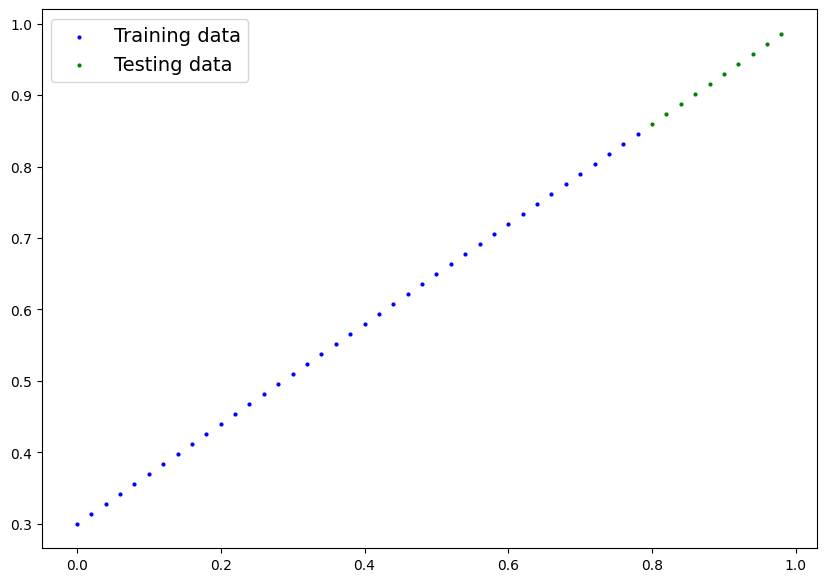

In [30]:
plot_predictions()

In [31]:
class LineaRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad = True))
        self.bias = nn.Parameter(torch.rand(1,dtype=torch.float,requires_grad=True))
        # rquires_grad means can we update the value with gradient descent

    def forward(self,x:torch.Tensor) -> torch.tensor:
        return self.weight * x + self.bias
    
model_0 = LineaRegression()
model_0

LineaRegression()

In [32]:
torch.manual_seed(42)
model_0.state_dict()
# every time we run the model code we get different values for state dict values
# so we need to put a seed

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [33]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [34]:
X_test.shape , X_test

(torch.Size([10]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]))

In [35]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds.shape

torch.Size([10])

In [36]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds[:10]}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([0.6598, 0.6665, 0.6733, 0.6800, 0.6867, 0.6935, 0.7002, 0.7069, 0.7137,
        0.7204])


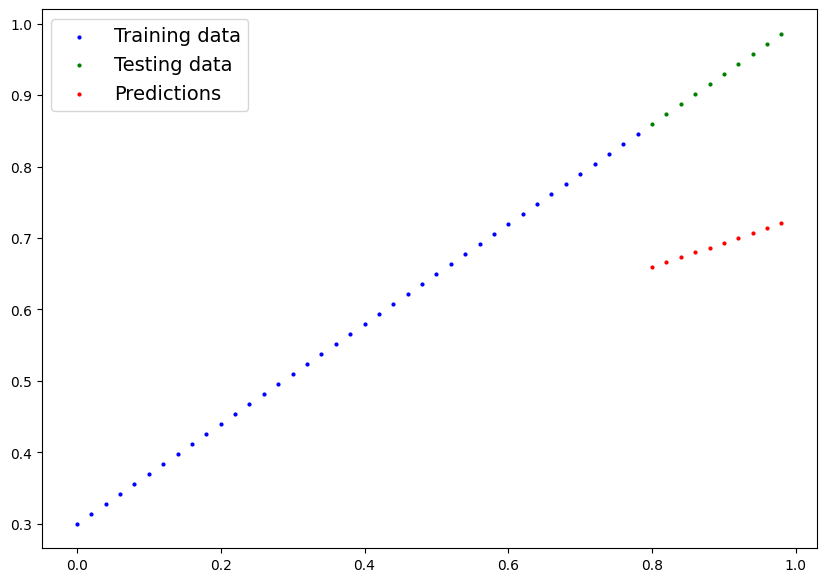

In [37]:
plot_predictions(predictions=y_preds)


In [38]:
# let's setup a loss function
loss_fn = nn.L1Loss()

In [39]:
# optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [40]:
# model training 
epochs = 100

for epoch in range(epochs):
    model_0.train()
    y_preds = model_0(X_train)

    loss = loss_fn(y_preds,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

# model evaluation
    model_0.eval()

    with torch.inference_mode():
        y_pred_test = model_0(X_test)

        test_loss = loss_fn(y_pred_test,y_test)

    if epoch % (0.1*epochs) == 0:
        print(f'epoch : {epoch} | loss : {loss} | test loss : {test_loss}')

epoch : 0 | loss : 0.08169572055339813 | test loss : 0.22662055492401123
epoch : 10 | loss : 0.06808149069547653 | test loss : 0.1807345449924469
epoch : 20 | loss : 0.06258393079042435 | test loss : 0.15627031028270721
epoch : 30 | loss : 0.05879194289445877 | test loss : 0.1418602615594864
epoch : 40 | loss : 0.05530194193124771 | test loss : 0.13084018230438232
epoch : 50 | loss : 0.051822252571582794 | test loss : 0.12050700187683105
epoch : 60 | loss : 0.04838593676686287 | test loss : 0.11223447322845459
epoch : 70 | loss : 0.044948760420084 | test loss : 0.10464880615472794
epoch : 80 | loss : 0.04152031987905502 | test loss : 0.09637625515460968
epoch : 90 | loss : 0.03808232396841049 | test loss : 0.08810374140739441


In [41]:
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])